Dependencies

In [ ]:
!pip install -q langgraph langsmith
!pip install -q langchain langchain_groq langchain_community
from google.colab import userdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.5 MB/s eta 0:00:00


Setting up the envionment with API Keys

In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"]=userdata.get('LANGSMITH_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="Simple Chatbot"

In [ ]:
!pip install -q langchain_groq
from langchain_groq import ChatGroq
import os
groq_api_key=userdata.get('groq_api_key')
os.environ["GROQ_API_KEY"]=groq_api_key

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.2 MB/s eta 0:00:00


Setting your LLM model

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It") #model of your choice, you can take any other model like Gemini, Mistral etc.
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79d787e54a60>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79d787e55720>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

BASIC CHATBOT USING LANGGRAPH

Chatbot ready with few lines of code

In [ ]:
## Simple Chatbot Using Langgraph
from typing import Annotated
from typing_extensions import TypedDict


from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [ ]:
def chatbot(state:State):
  return {"messages":[llm.invoke(state["messages"])]}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

In [ ]:
while True:
  user_input=input("User:")
  if user_input.lower() in["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value["messages"])
      print("Assistant :",value["messages"][-1].content)

User:hi
dict_values([{'messages': [AIMessage(content='Hi there! 👋  What can I do for you today? 😊 \n', response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 10, 'total_tokens': 28, 'completion_time': 0.032727273, 'prompt_time': 4.1e-07, 'queue_time': 0.522943546, 'total_time': 0.032727683}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f245c1ce-77fb-4255-b2ee-c08b80106aff-0', usage_metadata={'input_tokens': 10, 'output_tokens': 18, 'total_tokens': 28})]}])
[AIMessage(content='Hi there! 👋  What can I do for you today? 😊 \n', response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 10, 'total_tokens': 28, 'completion_time': 0.032727273, 'prompt_time': 4.1e-07, 'queue_time': 0.522943546, 'total_time': 0.032727683}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f245c1ce-77fb-4255-b2ee-c08b80106aff-0'

KeyboardInterrupt: Interrupted by user

LANGGRAPH with Tools

In [ ]:
## Graph With Multiple Nodes
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


In [ ]:
!pip install -q arxiv wikipedia langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
### Working With Tools
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv and wikipedia Tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
wiki.invoke("What is MAchine LEarning?")
#

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and gen'

In [ ]:
tools=[wiki,arxiv]

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm_with_tools=llm.bind_tools(tools=tools)

In [ ]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}



In [ ]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")
#graph_builder.add_edge("chatbot", END)




In [ ]:
graph = graph_builder.compile()

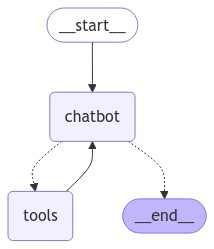

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
user_input = "Hello How Are you?."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hello How Are you?.
================================== Ai Message ==================================

I am doing well, thank you. How are you?
